In [1]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib as mpl  # to visualize data
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib.colors as mcolors # to visualize colors
import seaborn as sns # to visualize data
from sklearn.feature_extraction.text import TfidfVectorizer # to transfrom the text into numbers
from sklearn.metrics import * # to calculate the metrics
import pickle # to export the model for testing

pd.set_option('display.max_colwidth', None)


In [6]:
# Load the classifier from the file
with open('../../Training/LGBM/lgbm_model_without_stopwords.pkl', 'rb') as file:
    classifier = pickle.load(file)

# Check if the classifier is loaded correctly
print(classifier)

# load the vectorizer from file
with open('../../Data-Preparation/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
print(loaded_vectorizer)

LGBMClassifier(num_leaves=300)
TfidfVectorizer()


In [3]:
df_test_lgbm_with_stopwords = pd.read_csv('../../Data-Preparation/testdata_without_stopwords_preprocessed.csv')

In [4]:
# astype(str) is necesarry 
X = loaded_vectorizer.transform(df_test_lgbm_with_stopwords['Text'].astype(str))

In [7]:
# predict the sentiment
df_test_lgbm_with_stopwords['Prediction'] = classifier.predict(X)
df_test_lgbm_with_stopwords.head()

,Text,target,Ground_Truth_Label,Prediction
0,would like even little bit time work Laying 11 30 work 12 30 8 30,0,negative,0
1,Looking forward keeping touch Naomi long time since chatted,4,positive,4
2,Germany NBA airtime got International LP watch game sure,0,negative,4
3,future trouble favourite Bagley probably Running Blind Iceland Terrific,4,positive,4
4,know reason Opera popular mobile platform Firefox rocks ass,4,positive,4


In [8]:
# calculate metrics
accuracy = accuracy_score(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'])
precision = precision_score(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'], pos_label=4)
recall = recall_score(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'], pos_label=4)
f1 = f1_score(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'], pos_label=4)

# visualize metrics
print('LGBM')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print()


LGBM
Accuracy: 0.77
Precision: 0.75
Recall: 0.81
F1 Score: 0.78



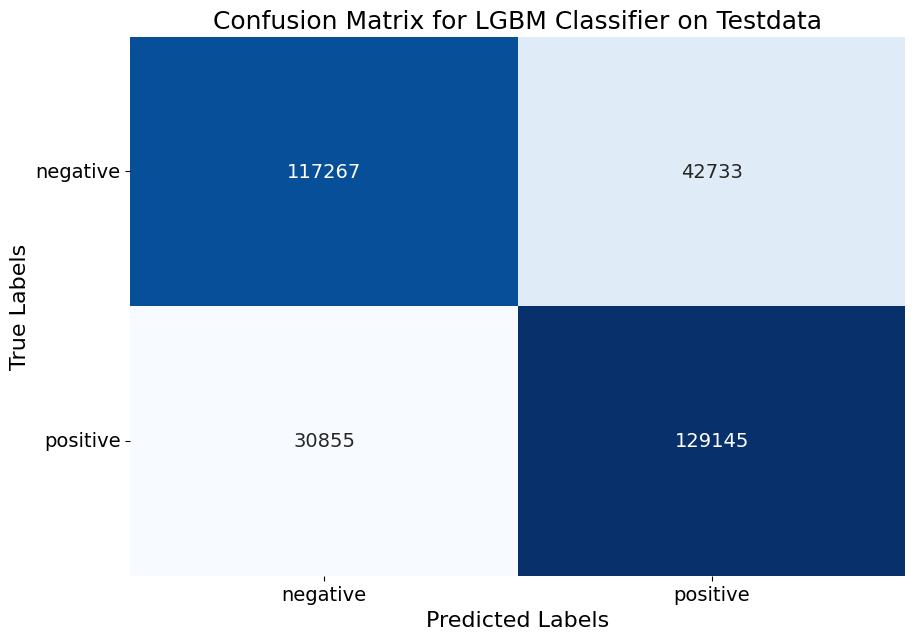

In [9]:
cm_nb = confusion_matrix(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'])


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for LGBM Classifier on Testdata', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()